# Data visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from os.path import join
import calendar
import altair as alt
from vega_datasets import data as vdata

cwd = os.getcwd()
data_path = join(cwd, '..', '..', 'data')

## Load data

In [24]:
path = join(data_path, 'processed', 'facility_gen_cap_emissions.csv')
df = pd.read_csv(path)

In [25]:
df.head()

,plant_id,month,net_gen_mwh,primary_gen_fuel,gross_load_mwh,so2_tons,nox_tons,co2_short_tons,heat_input_mmbtu,state,nameplate_capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,technology
0,2,1,-77.112,HYC,NaN,NaN,NaN,NaN,NaN,AL,53.9,56.0,52.0,52.0,Conventional Hydroelectric
1,2,2,-69.679,HYC,NaN,NaN,NaN,NaN,NaN,AL,53.9,56.0,52.0,52.0,Conventional Hydroelectric
2,2,3,-48.374,HYC,NaN,NaN,NaN,NaN,NaN,AL,53.9,56.0,52.0,52.0,Conventional Hydroelectric
3,2,4,-24.341,HYC,NaN,NaN,NaN,NaN,NaN,AL,53.9,56.0,52.0,52.0,Conventional Hydroelectric
4,2,5,-11.476,HYC,NaN,NaN,NaN,NaN,NaN,AL,53.9,56.0,52.0,52.0,Conventional Hydroelectric


In [26]:
top_tech = df.groupby('technology')['net_gen_mwh'].sum().sort_values(ascending=False).index[:9]
top_tech

Index(['Conventional Steam Coal', 'Natural Gas Fired Combined Cycle',
       'Nuclear', 'Conventional Hydroelectric', 'Onshore Wind Turbine',
       'Natural Gas Fired Combustion Turbine', 'Natural Gas Steam Turbine',
       'Wood/Wood Waste Biomass', 'Solar Photovoltaic'],
      dtype='object', name='technology')

In [27]:
df = df.loc[df['technology'].isin(top_tech)]

## Matplotlib
[Matplotlib](https://matplotlib.org/) is probably the most popular Python plotting package and it improved significantly with version 2.0. If you can imagine a figure, and have several hours/days of spare time, you can probably make it with matplotlib. On the plus side it allows you to customize nearly every pixel on a figure.

Text(0,0.5,'Total generation (MWh)')

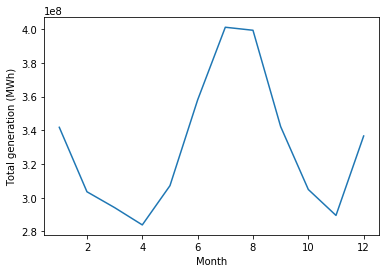

In [28]:
total_monthly = df.groupby('month', as_index=False).sum()

plt.plot(total_monthly.month, total_monthly.net_gen_mwh)
plt.xlabel('Month')
plt.ylabel('Total generation (MWh)')

### Plot with Pandas
Pandas has several matplotlib wrapper methods that let you plot the data in a dataframe. It will use the information (e.g. column names) to provide some labels on the figure.

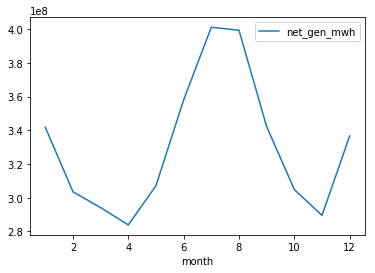

In [29]:
total_monthly.plot(x='month', y='net_gen_mwh')

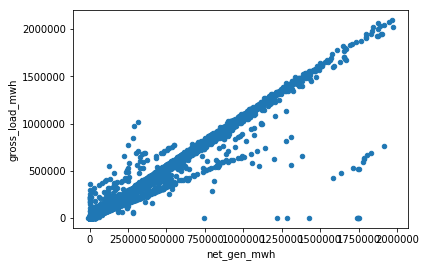

In [30]:
df.plot.scatter('net_gen_mwh', 'gross_load_mwh')

## Plot with Seaborn
Seaborn also wraps functions around matplotlib and provides much more powerful tools for exploring data. It was designed to work closely with Pandas dataframes. I highly recommend going through the [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html). 

### Distributions

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


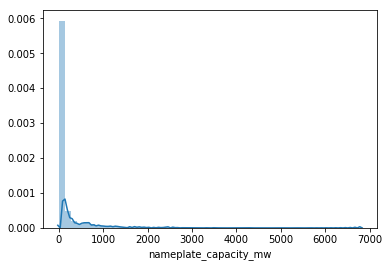

In [8]:
sns.distplot(df.nameplate_capacity_mw)

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


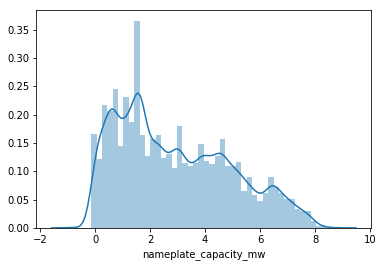

In [9]:
sns.distplot(df.nameplate_capacity_mw.apply(np.log))

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


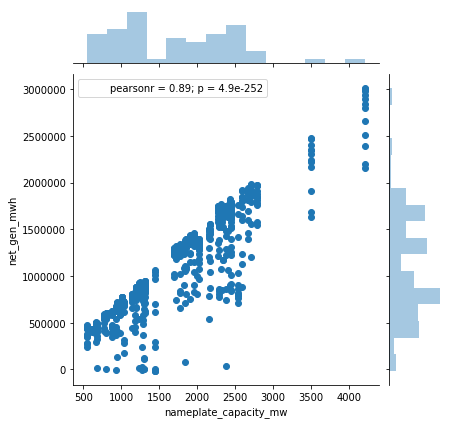

In [10]:
data = df.loc[df['technology'] == 'Nuclear']

sns.jointplot(x='nameplate_capacity_mw', y='net_gen_mwh', data=data)

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


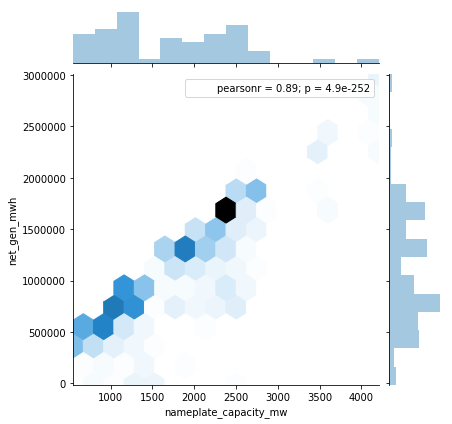

In [11]:
data = df.loc[df['technology'] == 'Nuclear']

sns.jointplot(x='nameplate_capacity_mw', y='net_gen_mwh', data=data, kind='hex')

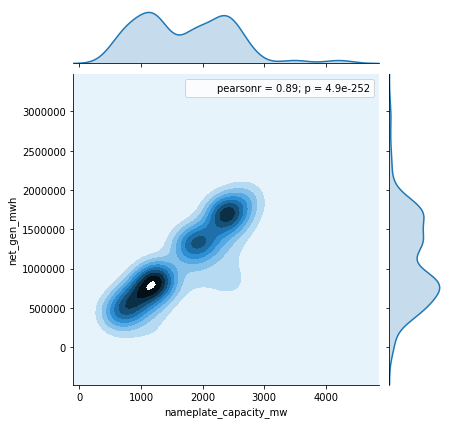

In [12]:
data = df.loc[df['technology'] == 'Nuclear']

sns.jointplot(x='nameplate_capacity_mw', y='net_gen_mwh', data=data, kind='kde')

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


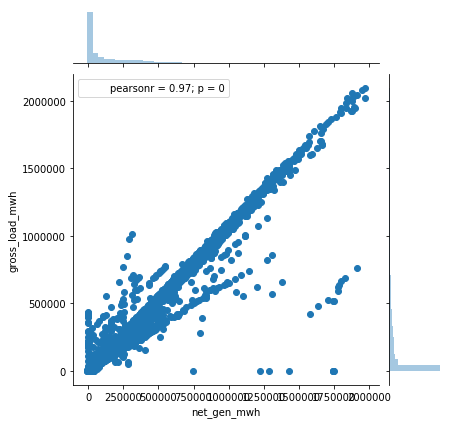

In [13]:
sns.jointplot('net_gen_mwh', 'gross_load_mwh', data=df)

### Categorical

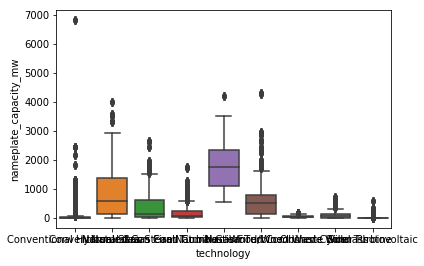

In [59]:
sns.boxplot(x='technology', y='nameplate_capacity_mw', data=df)

[Text(0,0,'Conventional Hydroelectric'),
 Text(0,0,'Conventional Steam Coal'),
 Text(0,0,'Natural Gas Steam Turbine'),
 Text(0,0,'Natural Gas Fired Combustion Turbine'),
 Text(0,0,'Nuclear'),
 Text(0,0,'Natural Gas Fired Combined Cycle'),
 Text(0,0,'Wood/Wood Waste Biomass'),
 Text(0,0,'Onshore Wind Turbine'),
 Text(0,0,'Solar Photovoltaic')]

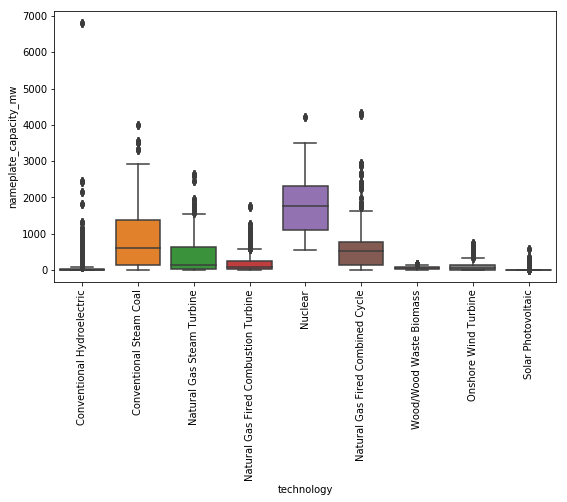

In [58]:
g = sns.boxplot(x='technology', y='nameplate_capacity_mw', data=df)
g.figure.set_size_inches(9, 5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Now I'll use the month as an **ordinal** variable

In [31]:
def month_hours(month):
    'Look up the number of hours in a given month'

    # second value in tuple is number of days in a month
    days = calendar.monthrange(2016, month)[-1]
    hours = days * 24

    return hours

In [32]:
df['capacity_factor'] = df.loc[:, 'net_gen_mwh'] / (df.loc[:, 'nameplate_capacity_mw'] * df['month'].apply(month_hours))

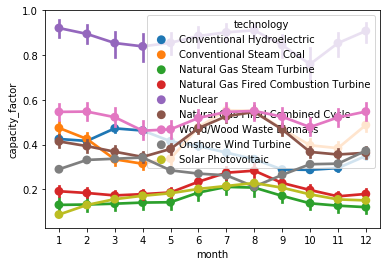

In [33]:
sns.pointplot(x='month', y='capacity_factor', hue='technology', data=df)

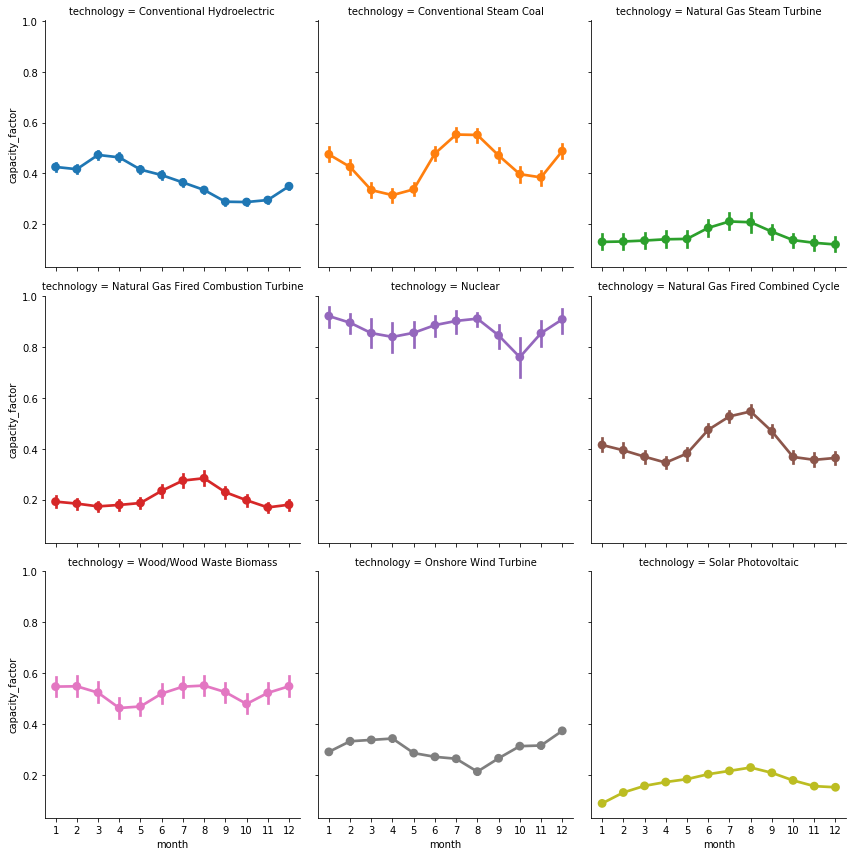

In [34]:
sns.factorplot(x='month', y='capacity_factor', hue='technology', col='technology',
               kind='point', col_wrap=3, data=df)

#### FacetGrid
FacetGrid is a lower-level but incredibly powerful plotting tool. It lets you create a grid with parameters splitting data by row, month, and hue. Then you can plot any function on that grid.

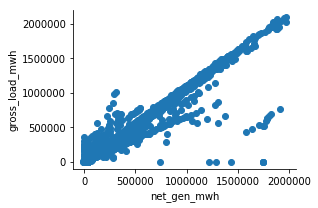

In [35]:
g = sns.FacetGrid(data=df, aspect=1.5)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')

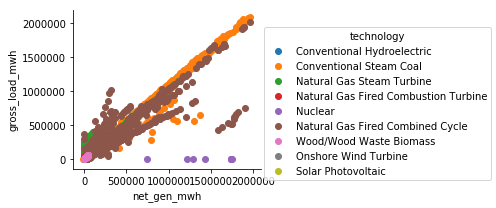

In [36]:
g = sns.FacetGrid(data=df, hue='technology', aspect=1.5)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')
g.add_legend()

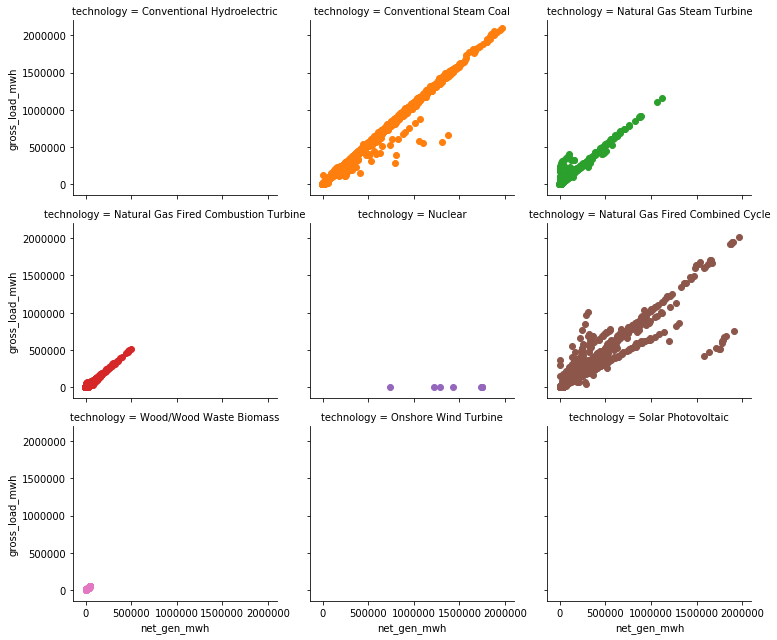

In [37]:
g = sns.FacetGrid(data=df, hue='technology', col='technology',
                  col_wrap=3, aspect=1.2)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')

What's the difference when we change hue to `month` rather than `technology`?

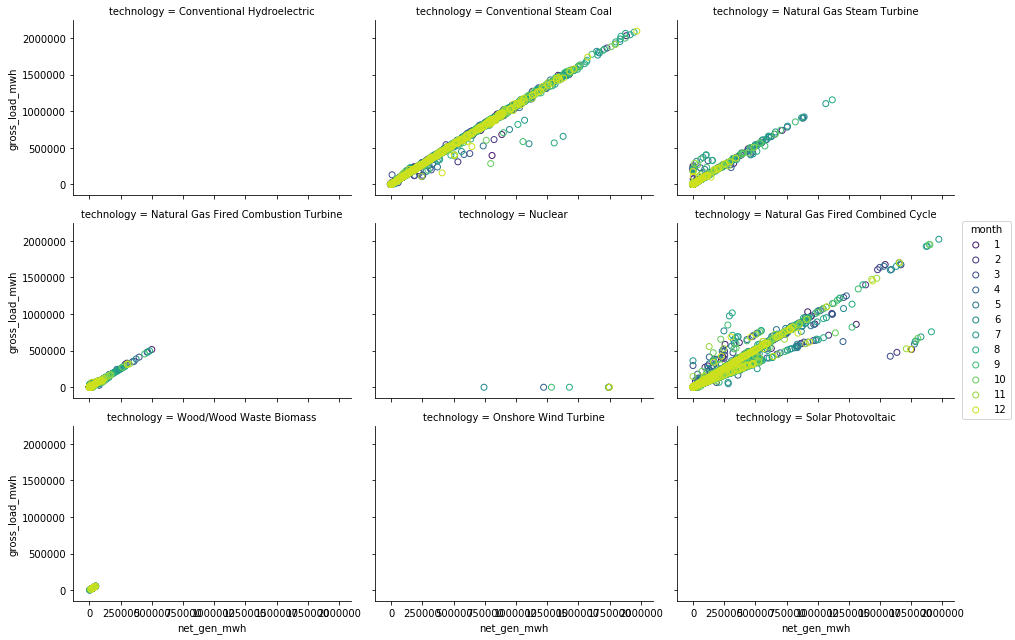

In [38]:
g = sns.FacetGrid(data=df, hue='month', col='technology',
                  col_wrap=3, aspect=1.5, palette='viridis')
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh', facecolors='none')
g.add_legend()

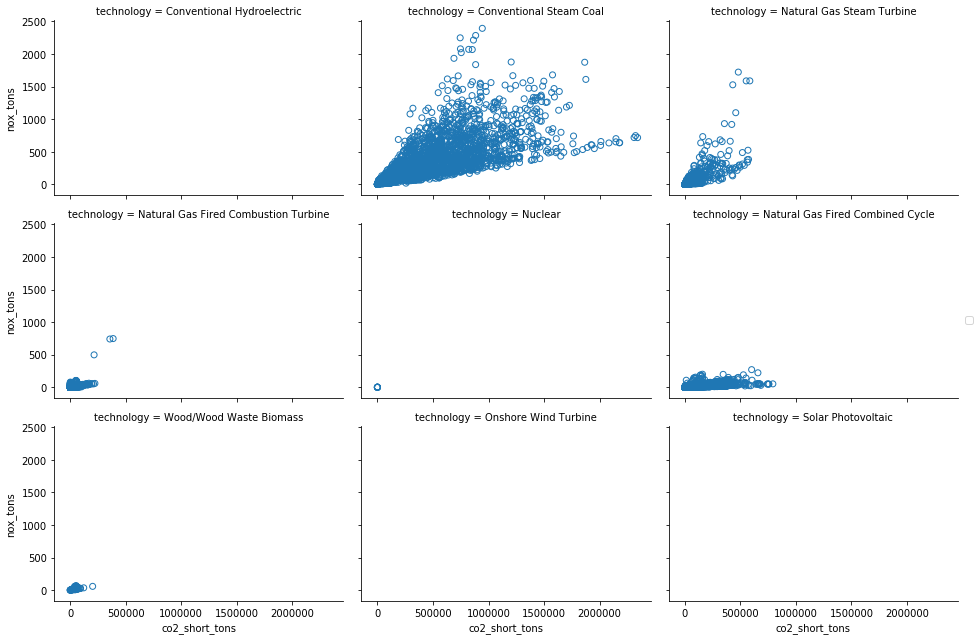

In [39]:
g = sns.FacetGrid(data=df, col='technology', col_wrap=3, aspect=1.5)
g.map(plt.scatter, 'co2_short_tons', 'nox_tons', facecolors='none')
g.add_legend()

## Regressions

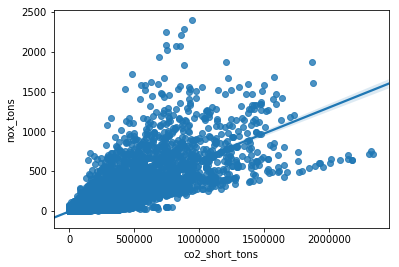

In [40]:
sns.regplot('co2_short_tons', 'nox_tons', data=df)

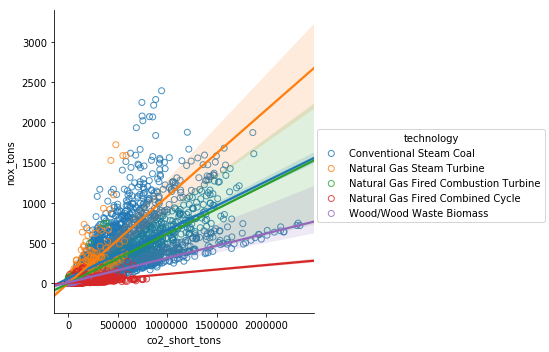

In [50]:
sns.lmplot('co2_short_tons', 'nox_tons', data=df.loc[df.technology != 'Nuclear'].dropna(),
           hue='technology', scatter_kws={'facecolor': 'none'})